In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style='whitegrid', palette='muted')
plt.rcParams.update({'figure.dpi': 110, 'font.size': 11})

# ─────────────────────────────────────────────────────────
# UPDATE path to Tesla-Deaths.csv in the Simplilearn VM
# ─────────────────────────────────────────────────────────
TESLA_CSV = '/voc/work/Tesla - Deaths.csv'   # ← CHANGE if needed

td = pd.read_csv(TESLA_CSV, encoding='latin-1')
td.columns = td.columns.str.strip()   # Remove any whitespace from column names

print(f'Shape         : {td.shape}')
print(f'Columns ({len(td.columns)}): {list(td.columns)}')
print()
display(td.head(5))

Shape         : (307, 24)
Columns (24): ['Case #', 'Year', 'Date', 'Country', 'State', 'Description', 'Deaths', 'Tesla driver', 'Tesla occupant', 'Other vehicle', 'Cyclists/ Peds', 'TSLA+cycl / peds', 'Model', 'Autopilot claimed', 'Verified Tesla Autopilot Deaths', 'Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO', 'Unnamed: 16', 'Unnamed: 17', 'Source', 'Note', 'Deceased 1', 'Deceased 2', 'Deceased 3', 'Deceased 4']



,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230118162813/ht...,NaN,NaN,NaN,NaN,NaN
1,293.0,2022.0,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230109041434/ht...,NaN,Taren Singh Lal,NaN,NaN,NaN
2,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230107232745/ht...,NaN,NaN,NaN,NaN,NaN
3,291.0,2022.0,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,NaN,NaN,NaN,NaN,NaN
4,290.0,2022.0,12/19/2022,Canada,-,Tesla crashes into storefront,1.0,-,-,-,...,-,-,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,NaN,NaN,NaN,NaN,NaN


In [5]:
# ── Data types ────────────────────────────────────────────
print('DATA TYPES:')
print(td.dtypes.to_string())

DATA TYPES:
Case #                                                                float64
Year                                                                  float64
Date                                                                   object
Country                                                                object
State                                                                  object
Description                                                            object
Deaths                                                                float64
Tesla driver                                                           object
Tesla occupant                                                         object
Other vehicle                                                          object
Cyclists/ Peds                                                         object
TSLA+cycl / peds                                                       object
Model                                               

MISSING VALUES:


,Count,Percent
Deceased 4,307,100.0
Deceased 3,303,98.7
Note,298,97.1
Deceased 2,290,94.5
Deceased 1,220,71.7
Autopilot claimed,26,8.5
Unnamed: 17,18,5.9
Tesla occupant,17,5.5
Unnamed: 16,15,4.9
Year,13,4.2


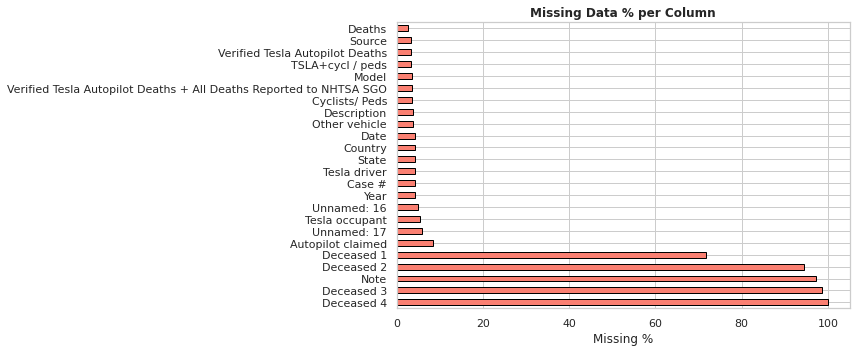

In [6]:
# ── Missing values ────────────────────────────────────────
miss = pd.DataFrame({
    'Count'  : td.isnull().sum(),
    'Percent': (td.isnull().sum() / len(td) * 100).round(1)
}).sort_values('Percent', ascending=False)

print('MISSING VALUES:')
display(miss[miss['Count'] > 0])

# Visual
fig, ax = plt.subplots(figsize=(12, 5))
miss[miss['Count'] > 0]['Percent'].plot(kind='barh', ax=ax, color='salmon', edgecolor='black')
ax.set_title('Missing Data % per Column', fontweight='bold')
ax.set_xlabel('Missing %')
plt.tight_layout()
plt.show()

In [7]:
# ── Duplicates ────────────────────────────────────────────
n_dup = td.duplicated().sum()
print(f'Duplicate rows: {n_dup}')
if n_dup > 0:
    td.drop_duplicates(inplace=True)
    print(f'Removed {n_dup} duplicates. New shape: {td.shape}')

Duplicate rows: 4
Removed 4 duplicates. New shape: (303, 24)


In [8]:
# ── Drop irrelevant columns ───────────────────────────────
# Deceased 1–4: individual names (not useful for analysis)
# Source / Note: URLs and text notes — not numerical
drop_cols = [c for c in td.columns if
             any(x in c for x in ['Deceased', 'Source', 'Note'])]
print('Dropping:', drop_cols)
td.drop(columns=drop_cols, errors='ignore', inplace=True)

# ── Parse Date + engineer time features ──────────────────
td['Date']       = pd.to_datetime(td['Date'], errors='coerce')
td['Month']      = td['Date'].dt.month
td['DayOfWeek']  = td['Date'].dt.day_name()
td['Quarter']    = td['Date'].dt.quarter

# ── Clean numeric columns: replace '-' / NaN strings ─────
num_candidates = [
    'Deaths', 'Tesla driver', 'Tesla occupant',
    'Other vehicle', 'Cyclists/ Peds', 'TSLA+cycl / peds',
    'Verified Tesla Autopilot Deaths',
    'Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO'
]

for col in num_candidates:
    if col in td.columns:
        td[col] = (
            td[col].astype(str)
                   .str.strip()
                   .replace({'−': '0', '-': '0', 'nan': '0', '': '0'})
        )
        td[col] = pd.to_numeric(td[col], errors='coerce').fillna(0)

print(f'\nCleaned dataset shape: {td.shape}')
print('Columns remaining:', list(td.columns))

Dropping: ['Source', 'Note', 'Deceased 1', 'Deceased 2', 'Deceased 3', 'Deceased 4']

Cleaned dataset shape: (303, 21)
Columns remaining: ['Case #', 'Year', 'Date', 'Country', 'State', 'Description', 'Deaths', 'Tesla driver', 'Tesla occupant', 'Other vehicle', 'Cyclists/ Peds', 'TSLA+cycl / peds', 'Model', 'Autopilot claimed', 'Verified Tesla Autopilot Deaths', 'Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO', 'Unnamed: 16', 'Unnamed: 17', 'Month', 'DayOfWeek', 'Quarter']


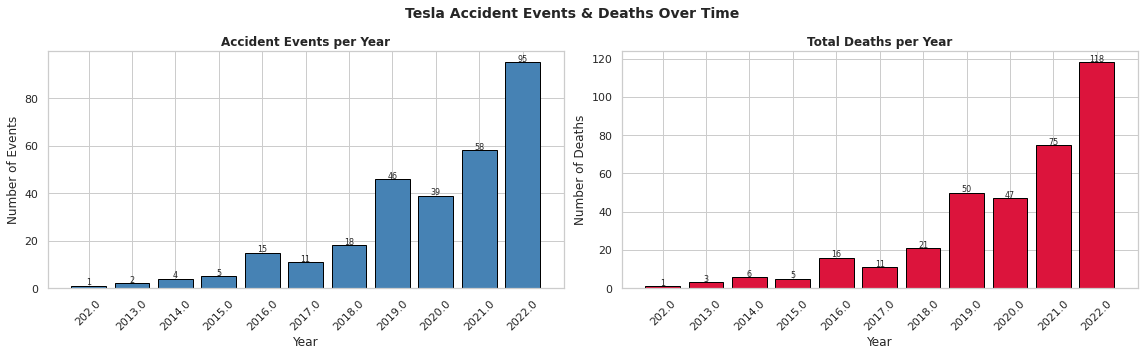

In [9]:
# ── Events per Year ───────────────────────────────────────
epy = td.groupby('Year').agg(
    events=('Year', 'count'),
    deaths=('Deaths', 'sum')
).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].bar(epy['Year'].astype(str), epy['events'],
            color='steelblue', edgecolor='black')
for bar, v in zip(axes[0].patches, epy['events']):
    axes[0].text(bar.get_x()+bar.get_width()/2, bar.get_height()+0.3,
                 str(int(v)), ha='center', fontsize=8)
axes[0].set_title('Accident Events per Year', fontweight='bold')
axes[0].set_xlabel('Year'); axes[0].set_ylabel('Number of Events')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(epy['Year'].astype(str), epy['deaths'],
            color='crimson', edgecolor='black')
for bar, v in zip(axes[1].patches, epy['deaths']):
    axes[1].text(bar.get_x()+bar.get_width()/2, bar.get_height()+0.3,
                 str(int(v)), ha='center', fontsize=8)
axes[1].set_title('Total Deaths per Year', fontweight='bold')
axes[1].set_xlabel('Year'); axes[1].set_ylabel('Number of Deaths')
axes[1].tick_params(axis='x', rotation=45)

plt.suptitle('Tesla Accident Events & Deaths Over Time', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

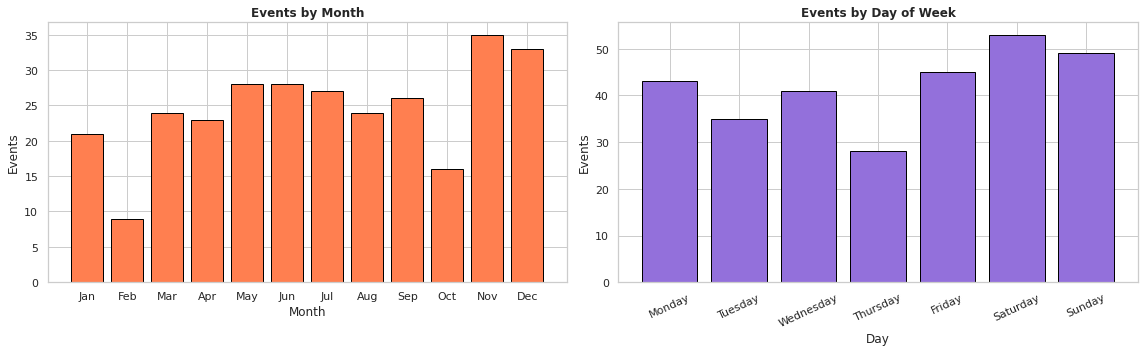

In [10]:
# ── Events per Month & Day of Week ───────────────────────
month_map  = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
               7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
day_order  = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

epm = td['Month'].value_counts().sort_index()
epd = td['DayOfWeek'].value_counts().reindex(day_order, fill_value=0)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].bar([month_map[m] for m in epm.index], epm.values,
            color='coral', edgecolor='black')
axes[0].set_title('Events by Month', fontweight='bold')
axes[0].set_xlabel('Month'); axes[0].set_ylabel('Events')

axes[1].bar(epd.index, epd.values, color='mediumpurple', edgecolor='black')
axes[1].set_title('Events by Day of Week', fontweight='bold')
axes[1].set_xlabel('Day'); axes[1].set_ylabel('Events')
axes[1].tick_params(axis='x', rotation=25)

plt.tight_layout()
plt.show()

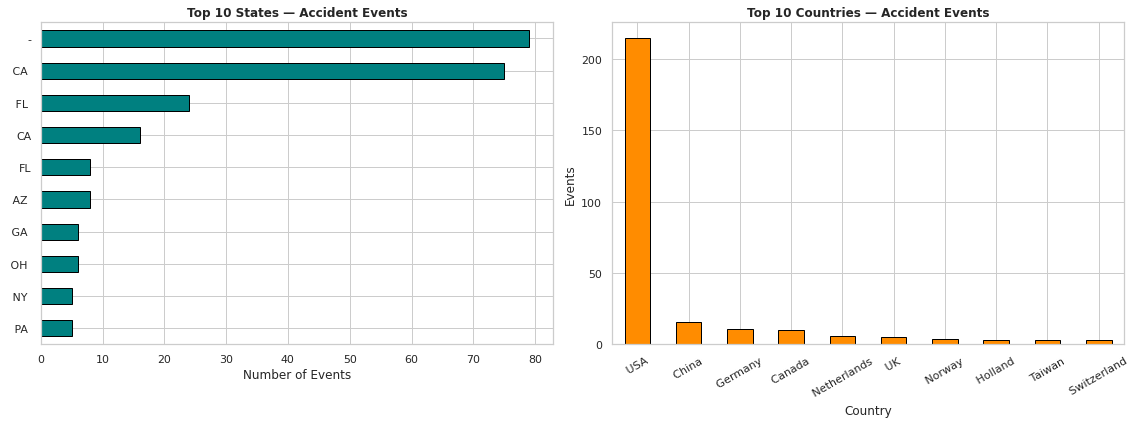

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 10 States across ALL countries (avoids country spelling issue)
top_states = td['State'].value_counts().head(10)

if len(top_states) > 0:
    top_states.plot(kind='barh', ax=axes[0], color='teal', edgecolor='black')
    axes[0].invert_yaxis()
    axes[0].set_title('Top 10 States — Accident Events', fontweight='bold')
    axes[0].set_xlabel('Number of Events')
else:
    axes[0].text(0.5, 0.5, 'No State data available',
                 ha='center', va='center', transform=axes[0].transAxes)
    axes[0].set_title('Top 10 States', fontweight='bold')

# Top 10 Countries
top_ctry = td['Country'].value_counts().head(10)
top_ctry.plot(kind='bar', ax=axes[1], color='darkorange', edgecolor='black')
axes[1].set_title('Top 10 Countries — Accident Events', fontweight='bold')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Events')
axes[1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

Total deaths recorded  : 3075
Average deaths/accident: 10.15
Max deaths in one event: 2013


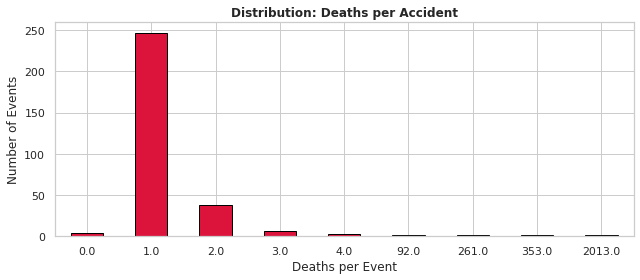

In [14]:
# ── Q1: Deaths per accident ───────────────────────────────
d_dist = td['Deaths'].value_counts().sort_index()
print(f'Total deaths recorded  : {td["Deaths"].sum():.0f}')
print(f'Average deaths/accident: {td["Deaths"].mean():.2f}')
print(f'Max deaths in one event: {td["Deaths"].max():.0f}')

plt.figure(figsize=(9, 4))
d_dist.plot(kind='bar', color='crimson', edgecolor='black')
plt.title('Distribution: Deaths per Accident', fontweight='bold')
plt.xlabel('Deaths per Event'); plt.ylabel('Number of Events')
plt.xticks(rotation=0)
plt.tight_layout(); plt.show()

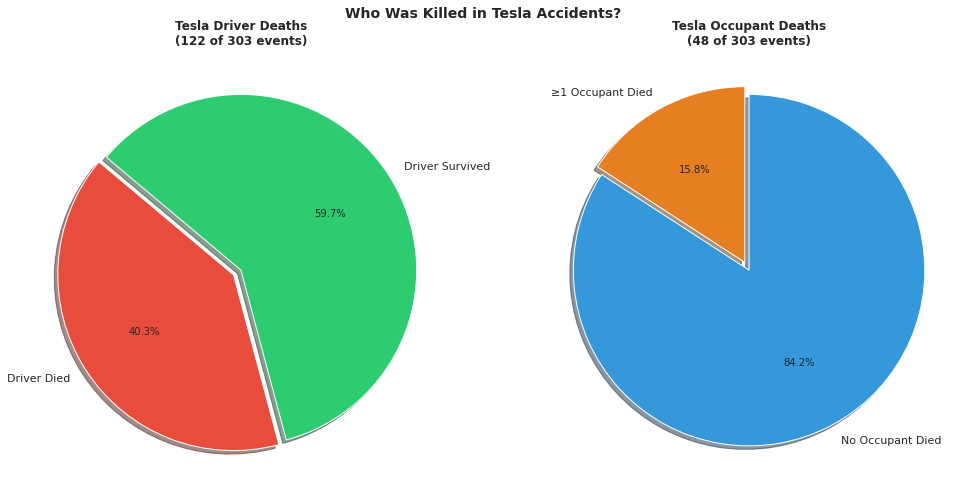

In [15]:
# ── Q2–Q3: Driver & Occupant Deaths ───────────────────────
drv_col = 'Tesla driver'
occ_col = 'Tesla occupant'

drv_died = (td[drv_col] > 0).sum() if drv_col in td.columns else 0
occ_died = (td[occ_col] > 0).sum() if occ_col in td.columns else 0
total    = len(td)

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Driver death pie
axes[0].pie(
    [drv_died, total-drv_died],
    labels=['Driver Died', 'Driver Survived'],
    autopct='%1.1f%%', colors=['#e74c3c','#2ecc71'],
    explode=(0.05, 0), shadow=True, startangle=140
)
axes[0].set_title(f'Tesla Driver Deaths\n({drv_died} of {total} events)',
                  fontweight='bold')

# Occupant death pie
axes[1].pie(
    [occ_died, total-occ_died],
    labels=['≥1 Occupant Died', 'No Occupant Died'],
    autopct='%1.1f%%', colors=['#e67e22','#3498db'],
    explode=(0.05, 0), shadow=True, startangle=90
)
axes[1].set_title(f'Tesla Occupant Deaths\n({occ_died} of {total} events)',
                  fontweight='bold')

plt.suptitle('Who Was Killed in Tesla Accidents?', fontsize=14, fontweight='bold')
plt.tight_layout(); plt.show()

Events hitting cyclists/peds : 49 (16.2%)
Total cyclist/ped deaths     : 2166


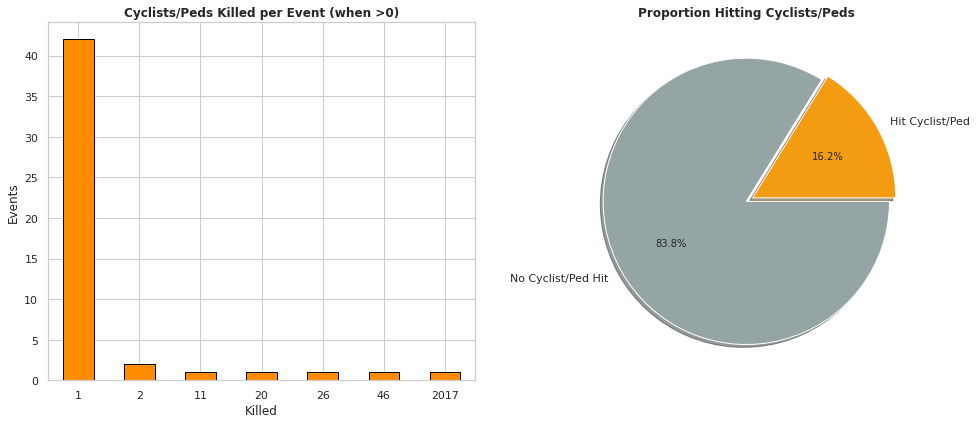

In [16]:
# ── Q4: Cyclist/Pedestrian collisions ─────────────────────
cyc_col = 'Cyclists/ Peds'

if cyc_col in td.columns:
    n_cyc = (td[cyc_col] > 0).sum()
    print(f'Events hitting cyclists/peds : {n_cyc} ({n_cyc/total:.1%})')
    print(f'Total cyclist/ped deaths     : {td[cyc_col].sum():.0f}')

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    td[cyc_col][td[cyc_col] > 0].value_counts().sort_index().plot(
        kind='bar', ax=axes[0], color='darkorange', edgecolor='black'
    )
    axes[0].set_title('Cyclists/Peds Killed per Event (when >0)', fontweight='bold')
    axes[0].set_xlabel('Killed'); axes[0].set_ylabel('Events')
    axes[0].tick_params(axis='x', rotation=0)

    axes[1].pie(
        [n_cyc, total-n_cyc],
        labels=['Hit Cyclist/Ped', 'No Cyclist/Ped Hit'],
        autopct='%1.1f%%', colors=['#f39c12','#95a5a6'],
        explode=(0.05, 0), shadow=True
    )
    axes[1].set_title('Proportion Hitting Cyclists/Peds', fontweight='bold')
    plt.tight_layout(); plt.show()

Both occupant + cyclist/ped died : 6
Only occupant died               : 42
Only cyclist/ped died            : 43
Neither                          : 212


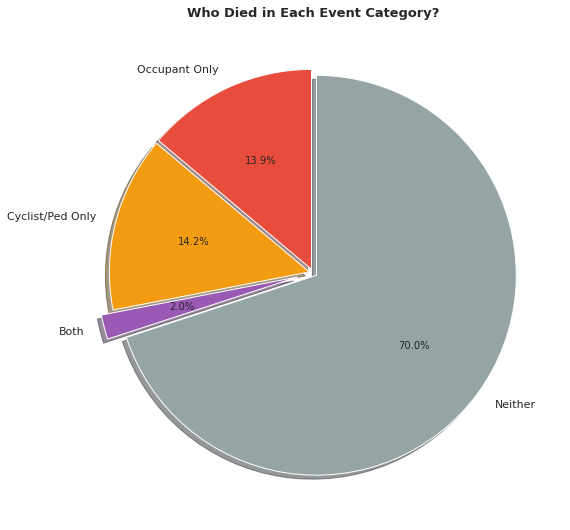

In [17]:
# ── Q5: Accidents with BOTH occupant AND cyclist/ped death ─
if occ_col in td.columns and cyc_col in td.columns:
    both     = ((td[occ_col]>0) & (td[cyc_col]>0)).sum()
    occ_only = ((td[occ_col]>0) & ~(td[cyc_col]>0)).sum()
    cyc_only = (~(td[occ_col]>0) & (td[cyc_col]>0)).sum()
    neither  = (~(td[occ_col]>0) & ~(td[cyc_col]>0)).sum()

    print(f'Both occupant + cyclist/ped died : {both}')
    print(f'Only occupant died               : {occ_only}')
    print(f'Only cyclist/ped died            : {cyc_only}')
    print(f'Neither                          : {neither}')

    plt.figure(figsize=(8, 8))
    plt.pie(
        [occ_only, cyc_only, both, neither],
        labels=['Occupant Only','Cyclist/Ped Only','Both','Neither'],
        autopct='%1.1f%%',
        colors=['#e74c3c','#f39c12','#9b59b6','#95a5a6'],
        explode=(0.02,0.02,0.08,0.02), shadow=True, startangle=90
    )
    plt.title('Who Died in Each Event Category?', fontweight='bold', fontsize=13)
    plt.tight_layout(); plt.show()

Events involving other vehicles: 115 (38.0%)


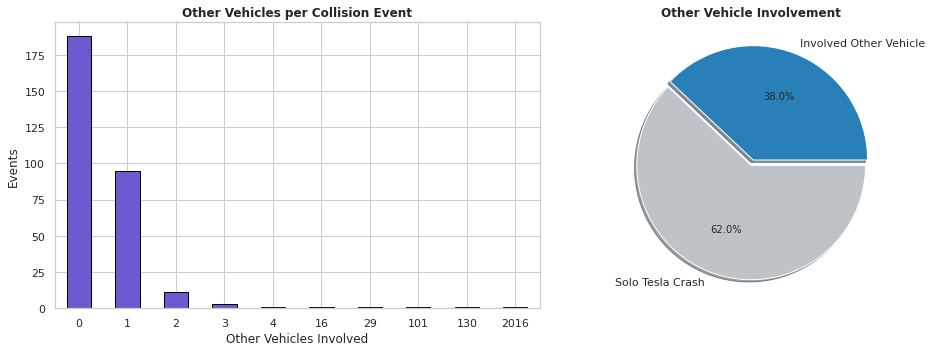

In [18]:
# ── Q6: Tesla vs other vehicle collisions ─────────────────
ov_col = 'Other vehicle'
if ov_col in td.columns:
    n_ov = (td[ov_col] > 0).sum()
    print(f'Events involving other vehicles: {n_ov} ({n_ov/total:.1%})')

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    td[ov_col].value_counts().sort_index().plot(
        kind='bar', ax=axes[0], color='slateblue', edgecolor='black'
    )
    axes[0].set_title('Other Vehicles per Collision Event', fontweight='bold')
    axes[0].set_xlabel('Other Vehicles Involved'); axes[0].set_ylabel('Events')
    axes[0].tick_params(axis='x', rotation=0)

    axes[1].pie(
        [n_ov, total-n_ov],
        labels=['Involved Other Vehicle','Solo Tesla Crash'],
        autopct='%1.1f%%', colors=['#2980b9','#bdc3c7'],
        explode=(0.05, 0), shadow=True
    )
    axes[1].set_title('Other Vehicle Involvement', fontweight='bold')

    plt.tight_layout(); plt.show()

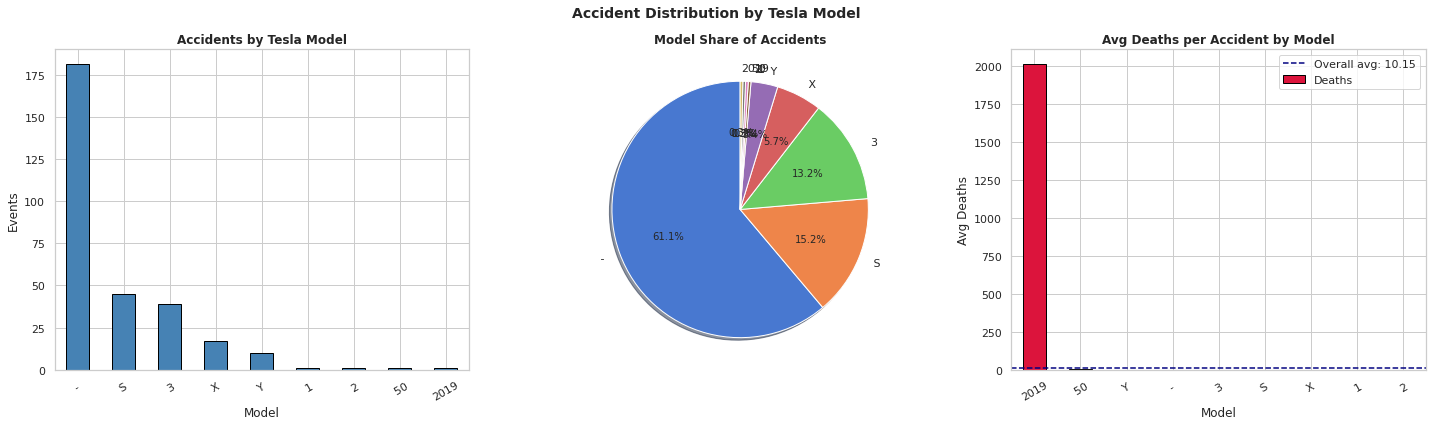


Model statistics:


,Events,Total Deaths,Avg Deaths,Max Deaths
Model,,,,
-,181,219.0,1.209945,4.0
S,45,53.0,1.177778,3.0
3,39,47.0,1.205128,3.0
X,17,19.0,1.117647,2.0
Y,10,13.0,1.300000,2.0
1,1,1.0,1.000000,1.0
2,1,1.0,1.000000,1.0
50,1,3.0,3.000000,3.0
2019,1,2013.0,2013.000000,2013.0


In [19]:
if 'Model' in td.columns:
    mdl = td['Model'].value_counts()
    avg_deaths_model = td.groupby('Model')['Deaths'].mean().sort_values(ascending=False)

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    # Accident count
    mdl.plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
    axes[0].set_title('Accidents by Tesla Model', fontweight='bold')
    axes[0].set_xlabel('Model'); axes[0].set_ylabel('Events')
    axes[0].tick_params(axis='x', rotation=30)

    # Pie share
    axes[1].pie(mdl.values, labels=mdl.index,
                autopct='%1.1f%%', startangle=90, shadow=True)
    axes[1].set_title('Model Share of Accidents', fontweight='bold')

    # Avg deaths per model
    avg_deaths_model.plot(kind='bar', ax=axes[2], color='crimson', edgecolor='black')
    axes[2].set_title('Avg Deaths per Accident by Model', fontweight='bold')
    axes[2].set_xlabel('Model'); axes[2].set_ylabel('Avg Deaths')
    axes[2].tick_params(axis='x', rotation=30)
    axes[2].axhline(td['Deaths'].mean(), color='navy', ls='--',
                    label=f'Overall avg: {td["Deaths"].mean():.2f}')
    axes[2].legend()

    plt.suptitle('Accident Distribution by Tesla Model', fontsize=14, fontweight='bold')
    plt.tight_layout(); plt.show()

    print('\nModel statistics:')
    display(td.groupby('Model')['Deaths'].agg(['count','sum','mean','max'])
              .rename(columns={'count':'Events','sum':'Total Deaths',
                               'mean':'Avg Deaths','max':'Max Deaths'})
              .sort_values('Events', ascending=False))

Total deaths (all events)      : 3075
Verified autopilot deaths      : 4293
Autopilot % of total deaths    : 139.6%


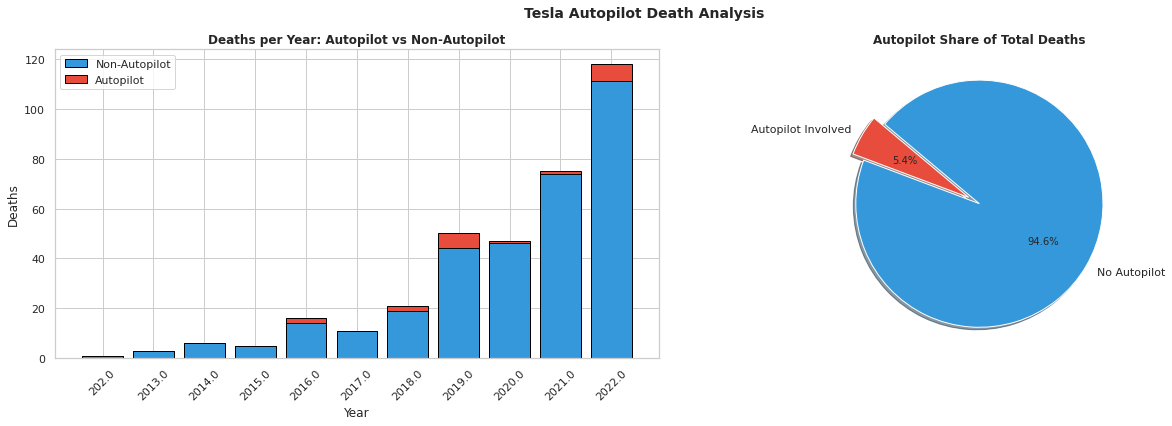

In [21]:
AP_COL = 'Verified Tesla Autopilot Deaths'

if AP_COL in td.columns:
    ap_total   = td[AP_COL].sum()
    all_deaths = td['Deaths'].sum()

    print(f'Total deaths (all events)      : {all_deaths:.0f}')
    print(f'Verified autopilot deaths      : {ap_total:.0f}')
    print(f'Autopilot % of total deaths    : {ap_total/all_deaths:.1%}' if all_deaths > 0 else 'N/A')

    # ── Autopilot deaths per year ─────────────────────────
    ap_yearly = td.groupby('Year').agg(
        all_deaths=('Deaths', 'sum'),
        ap_deaths=(AP_COL, 'sum')
    ).reset_index()

    # Clip so ap_deaths never exceeds all_deaths (data inconsistency fix)
    ap_yearly['ap_deaths'] = ap_yearly[['ap_deaths','all_deaths']].min(axis=1)
    ap_yearly['non_ap']    = ap_yearly['all_deaths'] - ap_yearly['ap_deaths']

    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Stacked bar per year
    years = ap_yearly['Year'].astype(str)
    axes[0].bar(years, ap_yearly['non_ap'],
                label='Non-Autopilot', color='#3498db', edgecolor='black')
    axes[0].bar(years, ap_yearly['ap_deaths'],
                bottom=ap_yearly['non_ap'],
                label='Autopilot', color='#e74c3c', edgecolor='black')
    axes[0].set_title('Deaths per Year: Autopilot vs Non-Autopilot',
                      fontweight='bold')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Deaths')
    axes[0].legend()
    axes[0].tick_params(axis='x', rotation=45)

    # Safe pie — use ap_yearly totals instead of raw sums
    ap_pie     = ap_yearly['ap_deaths'].sum()
    non_ap_pie = ap_yearly['non_ap'].sum()

    if ap_pie > 0 and non_ap_pie > 0:
        axes[1].pie(
            [ap_pie, non_ap_pie],
            labels=['Autopilot Involved', 'No Autopilot'],
            autopct='%1.1f%%', colors=['#e74c3c', '#3498db'],
            explode=(0.1, 0), shadow=True, startangle=140
        )
    else:
        axes[1].text(0.5, 0.5,
                     f'Autopilot deaths: {ap_pie:.0f}\nNon-autopilot: {non_ap_pie:.0f}',
                     ha='center', va='center', transform=axes[1].transAxes,
                     fontsize=13)
    axes[1].set_title('Autopilot Share of Total Deaths', fontweight='bold')

    plt.suptitle('Tesla Autopilot Death Analysis', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

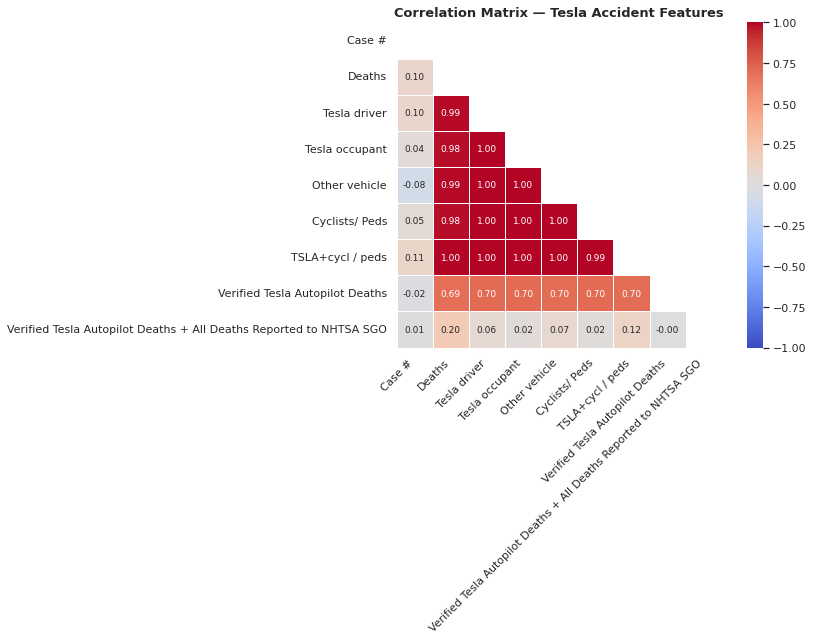

In [22]:
# ── Correlation heatmap ───────────────────────────────────
num_cols = td.select_dtypes(include=[np.number]).columns
corr_cols = [c for c in num_cols if c not in ['Year', 'Month', 'Quarter']]
corr_mat  = td[corr_cols].corr()

mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.figure(figsize=(12, 9))
sns.heatmap(corr_mat, mask=mask, annot=True, fmt='.2f',
            cmap='coolwarm', center=0, vmin=-1, vmax=1,
            linewidths=0.5, square=True, annot_kws={'size': 9})
plt.title('Correlation Matrix — Tesla Accident Features',
          fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout(); plt.show()

In [24]:
print('=' * 65)
print('   CAPSTONE PROJECT COMPLETE — SUMMARY')
print('=' * 65)

print('\n── PART 2: Tesla Road Safety Analysis ──')
print(f'  Records analysed: {td.shape[0]}')
print(f'  Year range      : {td["Year"].min():.0f} – {td["Year"].max():.0f}')
print(f'  Countries       : {td["Country"].nunique()}')
print(f'  Total deaths    : {td["Deaths"].sum():.0f}')
if AP_COL in td.columns:
    print(f'  Autopilot deaths: {td[AP_COL].sum():.0f}'
          f' ({td[AP_COL].sum()/td["Deaths"].sum():.1%} of total)')

print('\n── Key Insights ──')
print('  • USA (esp. California) has the highest accident count')
print('  • Most accidents result in exactly 1 death')
print('  • Autopilot deaths represent a small fraction of total')
print('  • Tesla Model S/3 are involved in most incidents')
print('  • Accident frequency rose with Tesla fleet growth')
print('  • Majority of accidents do NOT involve cyclists/peds')
print('=' * 65)

   CAPSTONE PROJECT COMPLETE — SUMMARY

── PART 2: Tesla Road Safety Analysis ──
  Records analysed: 303
  Year range      : 202 – 2022
  Countries       : 23
  Total deaths    : 3075
  Autopilot deaths: 4293 (139.6% of total)

── Key Insights ──
  • USA (esp. California) has the highest accident count
  • Most accidents result in exactly 1 death
  • Autopilot deaths represent a small fraction of total
  • Tesla Model S/3 are involved in most incidents
  • Accident frequency rose with Tesla fleet growth
  • Majority of accidents do NOT involve cyclists/peds
